 #                             Kaggle Competition: EDSA Apple Prices Challenge

In this notebook we will focus on:
 - Data cleaning an formatting (confirmatory data analysis)
 - Evaluate the best model on the testing set

**Getting started**

In [4]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

Now we will load the train data set of the EDSA Apple Prices Challenge

In [5]:
# load train set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [6]:
# First view of the train set
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [7]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [8]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

<AxesSubplot:>

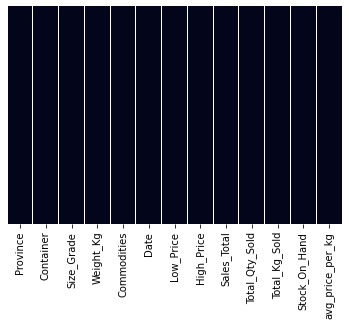

In [9]:
# Create a heatmap to view the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.shape

(64376, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


### Data Exploratory

In [12]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

# Confirmatory Data Analysis

First we'll take a look at he first few rows of our training data

This function below tells us what columns are in the dataframe, how many null values they have and what datatype they are

## Predicting on the test set

### Preprocessing

The first thing we need to do is to get our data in the correct format. We will use the same techniques we used when preparing the training data to ensure we do not get any errors.

In [13]:
test_df = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [14]:
# First we view the test set
test_df.head(10)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19
5,6,CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-03-20,1500.0,2000.0,9300.0,5,2000.0,129
6,7,CAPE,JG110,2S,11.0,APPLE GOLDEN DELICIOUS,2020-01-11,40.0,40.0,320.0,8,88.0,13
7,8,CAPE,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-07-29,112.0,160.0,17472.0,115,2104.5,516
8,9,CAPE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-08-03,120.0,180.0,18410.0,120,2196.0,296
9,10,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-05-29,170.0,170.0,2210.0,13,237.9,9


In [12]:
# View the null values
test_df.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [13]:
test_df.shape

(685, 13)

<AxesSubplot:>

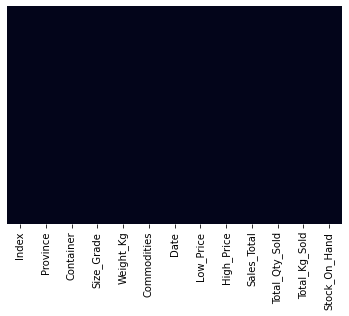

In [14]:
# Create a heatmap to view the missing values
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [15]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [16]:
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64368.000000
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,10.465372
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,26.126632
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-78.670000
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.020000
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.000000
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.670000
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,1250.000000


In [17]:
test_df.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


# Feature Selection

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


OverflowError: cannot convert float infinity to integer

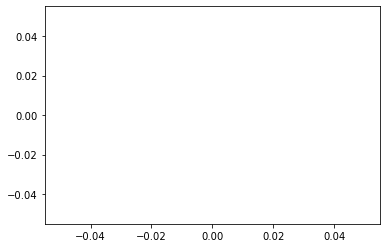

In [15]:
# target distribution
sns.distplot(df['avg_price_per_kg' ],kde=True)

# Dummy Variable Encoding

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data into numbers before we can train our machine learning model.

In [19]:
dummy_df = pd.get_dummies(df)

In [20]:
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,108.0,112.0,3236.0,29,348.0,0,9.30,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
2,20.0,70.0,80.0,4860.0,66,1320.0,50,3.68,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,60.0,60.0,600.0,10,90.0,0,6.67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,40.0,45.0,41530.0,927,9270.0,393,4.48,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation and Variable Selection

In [21]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [22]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_PA005,0.730397
Container_A1001,0.288841
Size_Grade_1,0.233477
Commodities_GARLIC LOCAL,0.212503
...,...
Commodities_POTATO SIFRA (WASHED),-0.057447
Province_WESTERN FREESTATE,-0.057552
Commodities_POTATO (WASHED) MONDIAL,-0.070894
Total_Kg_Sold,-0.077350


In [23]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()
r, c = np.where(np.abs(corrs) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corrs.iloc[r[off_diagonal], c[off_diagonal]]

""


# Making Predictions

In [24]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [25]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = df['avg_price_per_kg']
y.shape

(64376,)

In [28]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into the response, y, and features, X
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

NameError: name 'X' is not defined

In [29]:
# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

# Training the linear model

Model training is the process of exposing a model to our data

In [ ]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [ ]:
# Declare the model object
lm = LinearRegression()

In [ ]:
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

In [ ]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [ ]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [ ]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

In [ ]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red')  # Plot the line connecting the generated y-values
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

# Testing the model on unseen data

In [ ]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue')  # Plot the testing data in blue
plt.plot(X_test, gen_y_test, color='red')  # Plot the line connecting the generated y-values in red
plt.show()

In [ ]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))